In [235]:
import pandas as pd

import sys
print(sys.version)
sys.path.append('../../')
sys.path.append('../')
sys.path.append('../../../')


from drive.model_training.data_utils.extractors import * 
from drive.model_training.data_utils.animate_time_constant import * 
from first_order_model import *

from drive.util.model_func import *
from drive.util.transform_algebra import *



import matplotlib.animation as animation
from matplotlib.backend_bases import KeyEvent

import tqdm
import pickle

from matplotlib.backends.backend_pdf import PdfPages

import matplotlib as mpl
cmap = mpl.colormaps['viridis']



3.10.12 (main, Jul 19 2024, 11:05:56) [GCC 11.4.0]


In [236]:
path_to_dataset = "/home/nicolassamson/ros2_ws/src/DRIVE/drive_datasets/data/warthog/wheels/gravel/warthog_wheels_gravel_ral2023/model_training_datasets/slip_dataset_all.pkl"



df = pd.read_pickle(path_to_dataset)

print_column_unique_column(df)

['body_vel_disturption_x' 'body_vel_disturption_y'
 'body_vel_disturption_yaw' 'calib_step' 'cmd_body_vel_x' 'cmd_body_vel_y'
 'cmd_body_vel_yaw' 'cmd_left' 'cmd_right' 'end_time' 'gt_icp_pitch'
 'gt_icp_roll' 'gt_icp_x' 'gt_icp_y' 'gt_icp_yaw' 'gt_icp_z'
 'icp_corrected_interpolated_x' 'icp_corrected_interpolated_y'
 'icp_interpolated_x' 'icp_interpolated_y' 'icp_interpolated_yaw'
 'icp_omega' 'icp_pitch' 'icp_roll' 'icp_vel_x' 'icp_vel_y' 'icp_vel_yaw'
 'icp_vx' 'icp_vy' 'icp_x' 'icp_y' 'icp_yaw' 'icp_z' 'idd_vel_x'
 'idd_vel_y' 'idd_vel_yaw' 'imu_acceleration_x' 'imu_acceleration_y'
 'imu_acceleration_z' 'imu_yaw' 'init_icp_pitch' 'init_icp_roll'
 'init_icp_x' 'init_icp_y' 'init_icp_yaw' 'init_icp_z'
 'init_tf_pose_pitch' 'init_tf_pose_roll' 'init_tf_pose_x'
 'init_tf_pose_y' 'init_tf_pose_yaw' 'init_tf_pose_z' 'left_wheel_vel'
 'precedent_window_operation_point_mask'
 'pwrtrain_conscient_cmd_body_vel_x' 'pwrtrain_conscient_cmd_body_vel_y'
 'pwrtrain_conscient_cmd_body_vel_yaw' 'rig

array(['body_vel_disturption_x', 'body_vel_disturption_y',
       'body_vel_disturption_yaw', 'calib_step', 'cmd_body_vel_x',
       'cmd_body_vel_y', 'cmd_body_vel_yaw', 'cmd_left', 'cmd_right',
       'end_time', 'gt_icp_pitch', 'gt_icp_roll', 'gt_icp_x', 'gt_icp_y',
       'gt_icp_yaw', 'gt_icp_z', 'icp_corrected_interpolated_x',
       'icp_corrected_interpolated_y', 'icp_interpolated_x',
       'icp_interpolated_y', 'icp_interpolated_yaw', 'icp_omega',
       'icp_pitch', 'icp_roll', 'icp_vel_x', 'icp_vel_y', 'icp_vel_yaw',
       'icp_vx', 'icp_vy', 'icp_x', 'icp_y', 'icp_yaw', 'icp_z',
       'idd_vel_x', 'idd_vel_y', 'idd_vel_yaw', 'imu_acceleration_x',
       'imu_acceleration_y', 'imu_acceleration_z', 'imu_yaw',
       'init_icp_pitch', 'init_icp_roll', 'init_icp_x', 'init_icp_y',
       'init_icp_yaw', 'init_icp_z', 'init_tf_pose_pitch',
       'init_tf_pose_roll', 'init_tf_pose_x', 'init_tf_pose_y',
       'init_tf_pose_yaw', 'init_tf_pose_z', 'left_wheel_vel',
       'prec

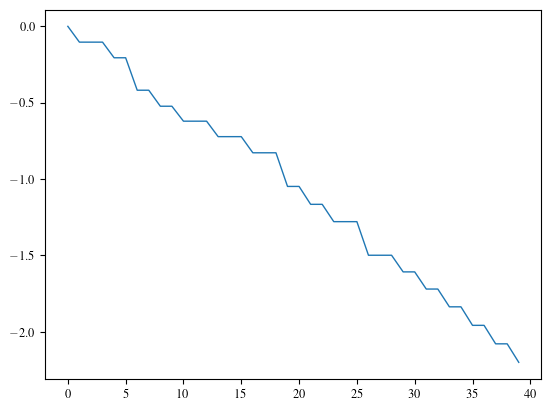

In [237]:

yaw = column_type_extractor(df,"icp_yaw")

time_axis = np.arange(yaw.shape[1])

fig, ax = plt.subplots(1,1)

index = 4

ax.plot(time_axis,yaw[index,:])



In [238]:
path_to_dataset = "/home/nicolassamson/ros2_ws/src/DRIVE/drive_datasets/data/warthog/wheels/gravel/warthog_wheels_gravel_ral2023/model_training_datasets/warthog_gravel_dataframe.pkl"

df_torch = pd.read_pickle(path_to_dataset)

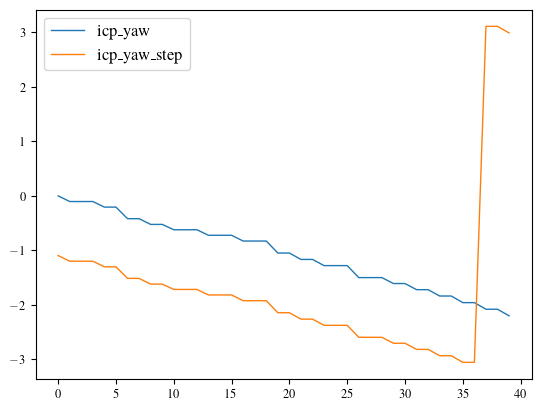

In [239]:

yaw_step = column_type_extractor(df_torch,"step_frame_icp_yaw")
yaw = column_type_extractor(df_torch,"icp_yaw")
time_axis = np.arange(yaw.shape[1])

fig, ax = plt.subplots(1,1)

index = 4

ax.plot(time_axis,yaw[index,:],label= "icp_yaw")

ax.plot(time_axis,yaw_step[index,:],label="icp_yaw_step")
ax.legend()


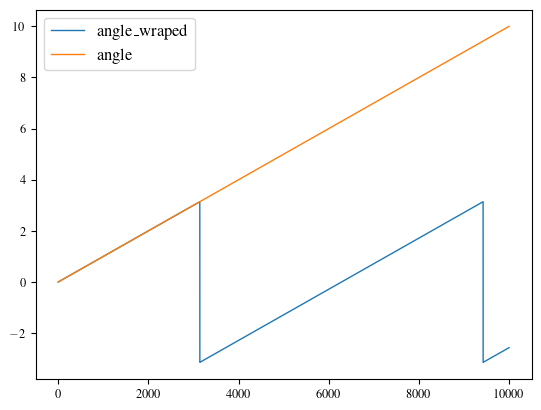

In [240]:

def wrap2pi(angle):
    if angle <= np.pi and angle >= -np.pi:
        return (angle)
    elif angle < -np.pi:
        return (wrap2pi(angle + 2 * np.pi))
    else:
        return (wrap2pi(angle - 2 * np.pi))


angle_array = np.linspace(0,10,10001)

angle_wrapped = np.array([wrap2pi(angle) for angle in angle_array])


time_axis = np.arange(angle_array.shape[0])

fig, ax = plt.subplots(1,1)


ax.plot(time_axis,angle_wrapped,label="angle_wraped")
ax.plot(time_axis,angle_array,label="angle")
ax.legend()


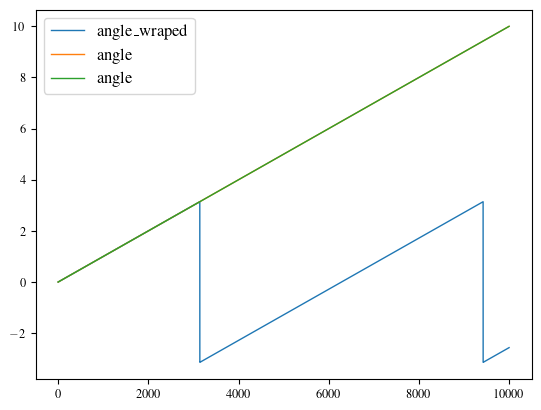

In [241]:
unwrapped_angles = np.unwrap(angle_wrapped,discont=np.pi)


fig, ax = plt.subplots(1,1)


ax.plot(time_axis,angle_wrapped,label="angle_wraped")
ax.plot(time_axis,angle_array,label="angle")
ax.plot(time_axis,unwrapped_angles,label="angle")
ax.legend()


count    35473.000000
mean         0.099880
std          1.784772
min         -3.140614
25%         -1.434042
50%         -0.111752
75%          1.770603
max          3.141055
Name: icp_yaw, dtype: float64

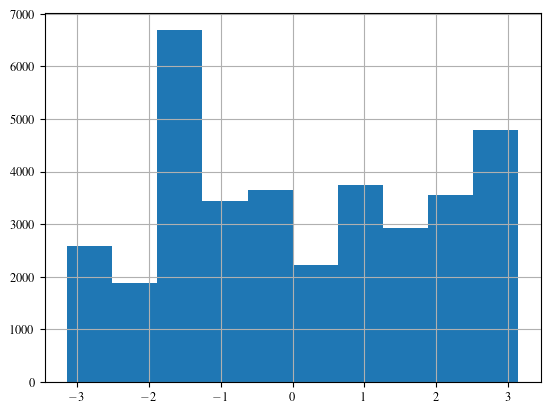

In [242]:
path_2_test  ="/home/nicolassamson/ros2_ws/src/DRIVE/drive/model_training/data_utils/debug/parsed_dataframe_df.pkl"

df_test = pd.read_pickle(path_2_test)

df_test["icp_yaw"].hist()
df_test["icp_yaw"].describe()

In [243]:

from scipy.spatial.transform import Rotation
delta_x = 1
delta_y = 1
delta_yaw = 0
delta_roll = 0
delta_pitch = 0
pose_initial = np.identity(4) 


rotation = Rotation.from_euler("xyz",[delta_roll, delta_pitch, delta_yaw])

transformation = np.identity(4)
transformation[:3,:3] = rotation.as_matrix()
transformation[0,3] = delta_x
transformation[1,3] = delta_y

n_iter = 20

pose_now = np.identity(4) 

pose_array = np.zeros((3,n_iter))
pose_euler = np.zeros((3,n_iter))

list_matrix = []
print(transformation)
for i in range(n_iter):
    
    pose_now = transformation @ pose_now
    list_matrix.append(pose_now)
    pose_array[:,i] = pose_now[:3,3]
    pose_euler[:,i] =  Rotation.from_matrix(pose_now[:3,:3]).as_euler("xyz")


[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


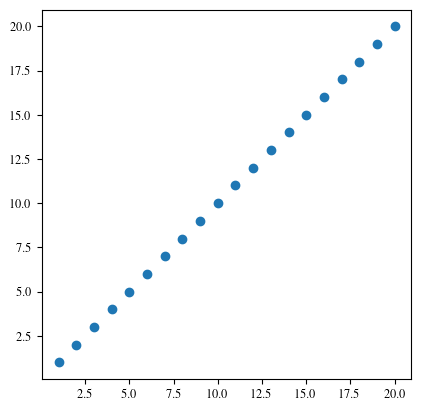

In [244]:
fig, ax  = plt.subplots(1,1)

ax.scatter(pose_array[0,:],pose_array[1,:])
ax.set_aspect("equal")


In [245]:
pose_initial = list_matrix[0]
print(pose_initial)

index = 10
pose_init_tf_inv = np.linalg.inv(pose_initial)

pose_2_repere_1 = pose_init_tf_inv @ list_matrix[index]

angle_tf = Rotation.from_matrix(pose_2_repere_1[:3,:3]).as_euler("xyz")
print(angle_tf)

angle_diff = pose_euler[:,index] - pose_euler[:,0]
print(angle_diff)

[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0. 0. 0.]
[0. 0. 0.]


In [246]:
from scipy.signal import *

In [247]:
noise_std = 0.30

x = pose_array[0,:]
noise  = np.random.normal(0,noise_std,size=x.shape)
x_bruite = x + noise

y = pose_array[1,:]
noise  = np.random.normal(0,noise_std,size=x.shape)
y_bruite = y + noise


0.1061032953945969


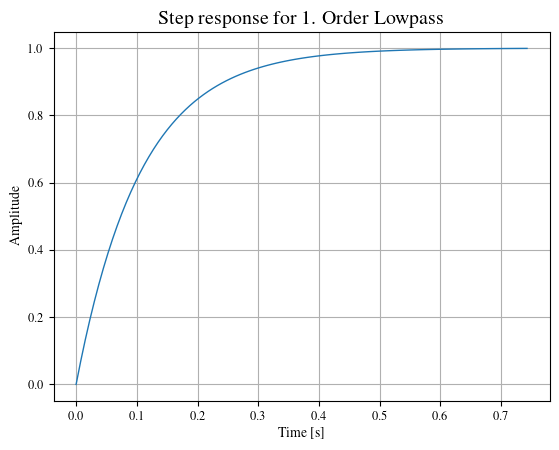

In [248]:
num = [1.0]

fc = 1.5 #hz
tau = 1/(2*np.pi*fc)
den = [tau, 1]
print(tau)
filter = lti(num,den)

time, yout = step(filter)

plt.plot(time, yout)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

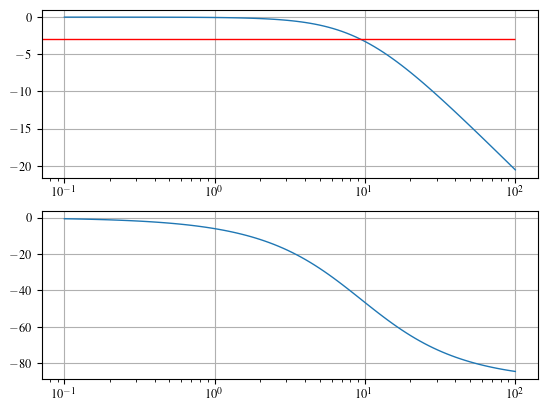

In [249]:
w, mag, phase = filter.bode()

fig,axs = plt.subplots(2,1)

axs[0].semilogx(w, mag)    # Bode magnitude plot
axs[0].grid()
axs[0].hlines(-3,0,100,color="red")
axs[1].semilogx(w, phase)  # Bode phase plot
axs[1].grid()

plt.show()

In [250]:
sampling_time = 1/20 # s

discrete_filter= filter.to_discrete(sampling_time)

x_filtre = filtfilt(discrete_filter.num,discrete_filter.den,x_bruite)




/home/nicolassamson/.pyenv/versions/3.10.12/envs/data_analysis/lib/python3.10/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


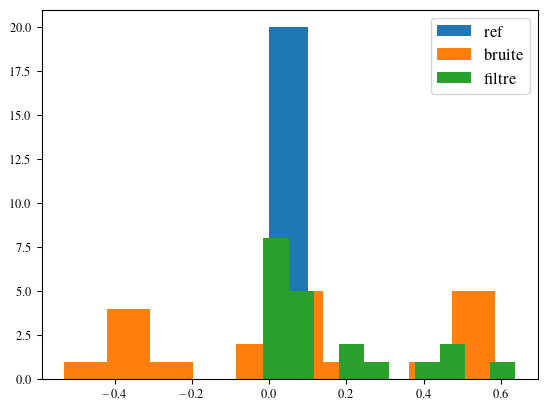

In [251]:


fig, ax  = plt.subplots(1,1)

ax.hist(x-x,label="ref")
ax.hist(x_bruite-x,label="bruite")
ax.hist(x_filtre-x,label="filtre")
ax.legend()


In [252]:
def init_filter(sampling_tim=1/20):
    num = [1.0]
    fc = 0.5 #hz
    tau = 1/(2*np.pi*fc)
    den = [tau, 1]
    print(tau)
    filter = lti(num,den)
    discrete_filter= filter.to_discrete(sampling_time)
    return discrete_filter

def filter_x_y_yaw(window_id,icp_x,icp_y,icp_yaw,discrete_filter,double_filt=True):

    x,y,yaw = icp_x[window_id,:], icp_y[window_id,:], icp_yaw[window_id,:]

    if double_filt:
        x_filtre = filtfilt(discrete_filter.num,discrete_filter.den,x)
        y_fitlre = filtfilt(discrete_filter.num,discrete_filter.den,y)
        yaw_fitlre = filtfilt(discrete_filter.num,discrete_filter.den,yaw)
    else:
        x_filtre = lfilter(discrete_filter.num,discrete_filter.den,x)
        y_fitlre = lfilter(discrete_filter.num,discrete_filter.den,y)
        yaw_fitlre = lfilter(discrete_filter.num,discrete_filter.den,yaw)
    return x_filtre, y_fitlre, yaw_fitlre


def filter_x_y_yaw_butterworth(window_id,icp_x,icp_y,icp_yaw,num,denum,double_filt=True):

    x,y,yaw = icp_x[window_id,:], icp_y[window_id,:], icp_yaw[window_id,:]

    if double_filt:
        x_filtre = filtfilt(num,denum,x)
        y_fitlre = filtfilt(num,denum,y)
        yaw_fitlre = filtfilt(num,denum,yaw)
    else:
        x_filtre = lfilter(num,denum,x)
        y_fitlre = lfilter(num,denum,y)
        yaw_fitlre = lfilter(num,denum,yaw)
    return x_filtre, y_fitlre, yaw_fitlre

def plot_quiv(ax,x,y,yaw,label,color):
    u = np.cos(yaw)
    v =np.sin(yaw)

    ax.quiver(x,y,u,v,label=label,color=[color(i) for i in range(u.shape[0])])

print_column_unique_column(df_torch)

['calib_step' 'cmd_left' 'cmd_right' 'end_time' 'gt_icp_pitch'
 'gt_icp_roll' 'gt_icp_x' 'gt_icp_y' 'gt_icp_yaw' 'gt_icp_z' 'icp_omega'
 'icp_pitch' 'icp_roll' 'icp_vx' 'icp_vy' 'icp_x' 'icp_y' 'icp_yaw'
 'icp_z' 'imu_acceleration_x' 'imu_acceleration_y' 'imu_acceleration_z'
 'imu_yaw' 'init_icp_pitch' 'init_icp_roll' 'init_icp_x' 'init_icp_y'
 'init_icp_yaw' 'init_icp_z' 'init_tf_pose_pitch' 'init_tf_pose_roll'
 'init_tf_pose_x' 'init_tf_pose_y' 'init_tf_pose_yaw' 'init_tf_pose_z'
 'left_wheel_vel' 'precedent_window_operation_point_mask'
 'right_wheel_vel' 'start_time' 'steady_state_mask' 'step_frame_icp_pitch'
 'step_frame_icp_roll' 'step_frame_icp_x' 'step_frame_icp_y'
 'step_frame_icp_yaw' 'step_frame_icp_z' 'transitory_state_mask']


array(['calib_step', 'cmd_left', 'cmd_right', 'end_time', 'gt_icp_pitch',
       'gt_icp_roll', 'gt_icp_x', 'gt_icp_y', 'gt_icp_yaw', 'gt_icp_z',
       'icp_omega', 'icp_pitch', 'icp_roll', 'icp_vx', 'icp_vy', 'icp_x',
       'icp_y', 'icp_yaw', 'icp_z', 'imu_acceleration_x',
       'imu_acceleration_y', 'imu_acceleration_z', 'imu_yaw',
       'init_icp_pitch', 'init_icp_roll', 'init_icp_x', 'init_icp_y',
       'init_icp_yaw', 'init_icp_z', 'init_tf_pose_pitch',
       'init_tf_pose_roll', 'init_tf_pose_x', 'init_tf_pose_y',
       'init_tf_pose_yaw', 'init_tf_pose_z', 'left_wheel_vel',
       'precedent_window_operation_point_mask', 'right_wheel_vel',
       'start_time', 'steady_state_mask', 'step_frame_icp_pitch',
       'step_frame_icp_roll', 'step_frame_icp_x', 'step_frame_icp_y',
       'step_frame_icp_yaw', 'step_frame_icp_z', 'transitory_state_mask'],
      dtype=object)

/tmp/ipykernel_234798/4184753237.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = [cm.get_cmap("Blues"), cm.get_cmap("Reds"),cm.get_cmap("Greens")]


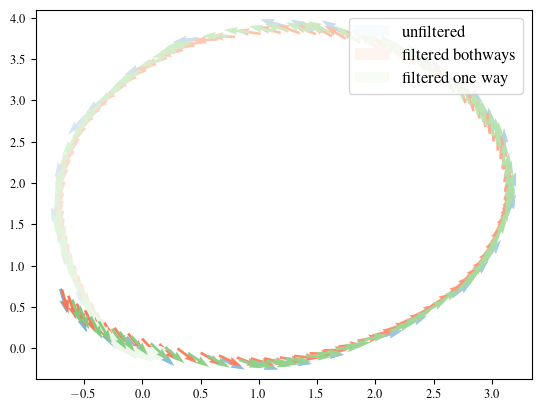

In [253]:

icp_x = reshape_into_6sec_windows(column_type_extractor(df_torch,"step_frame_icp_x"))
icp_y = reshape_into_6sec_windows(column_type_extractor(df_torch,"step_frame_icp_y"))
icp_yaw_wrapped = reshape_into_6sec_windows(column_type_extractor(df_torch,"step_frame_icp_yaw"))
icp_yaw = np.zeros_like(icp_yaw_wrapped)

for i in range(icp_yaw.shape[0]):
    icp_yaw[i,:] = np.unwrap(icp_yaw_wrapped[i,:])



window_id = 2
x_filtre, y_fitlre, yaw_fitlre =  filter_x_y_yaw(window_id,icp_x,icp_y,icp_yaw,discrete_filter)

x_filtre_one_way, y_fitlre_one_way, yaw_fitlre_one_way =  filter_x_y_yaw(window_id,icp_x,icp_y,icp_yaw,discrete_filter,double_filt=False)

fig, axs = plt.subplots(1,1)
color = [cm.get_cmap("Blues"), cm.get_cmap("Reds"),cm.get_cmap("Greens")]

plot_quiv(axs,icp_x[window_id,:],icp_y[window_id,:],icp_yaw[window_id,:],"unfiltered",color[0])
plot_quiv(axs,x_filtre, y_fitlre, yaw_fitlre,"filtered bothways",color[1])
plot_quiv(axs,x_filtre_one_way, y_fitlre_one_way, yaw_fitlre_one_way,"filtered one way",color[2])
axs.legend()

Si l'on filtrerait en temps reel se filtre la ne marcherait pas, car il engendrerais un trop grand decalage. Vu que l'on est offline il n'y a pas de probleme. COnclusion, il faut que double_filt = True

# Is using a higher order filter is better ?

After reading online, I realised that Butterworth filter are the basi filter that I have learned in DCA. The butterworth filter is a maximally flat magnitude filter in the sense that is ensure the maximum flat amplitude of the desired frequency.  https://en.wikipedia.org/wiki/Butterworth_filter

In [254]:
fs = 20
Wn =  fc #*2*np.pi#angular frequency in rad/s of the cut off frequency
btype="lowpass"
output = "ba"
N=1
num,denom = butter(N,Wn,btype=btype,output=output,fs=fs)

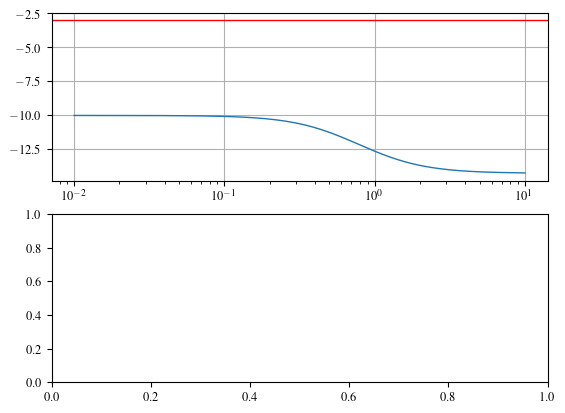

In [255]:

w, h = freqs(num, denom)
fig,axs = plt.subplots(2,1)

axs[0].semilogx(w, 20 * np.log10(abs(h)))    # Bode magnitude plot
axs[0].grid()
axs[0].hlines(-3,0,100,color="red")
#axs[1].semilogx(w, phase)  # Bode phase plot
#axs[1].grid()

plt.show()

/tmp/ipykernel_234798/2479848202.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = [cm.get_cmap("Blues"), cm.get_cmap("Reds"),cm.get_cmap("Greens")]


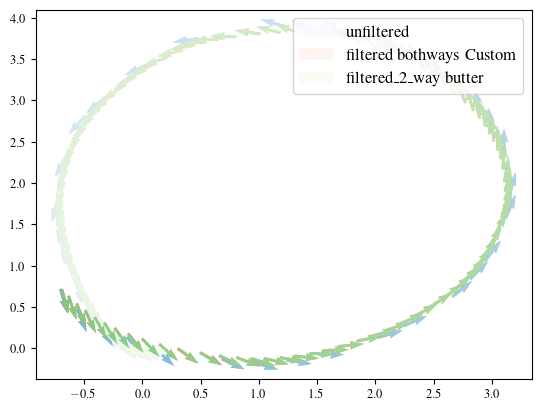

In [256]:

window_id = 2
x_filtre, y_fitlre, yaw_fitlre =  filter_x_y_yaw(window_id,icp_x,icp_y,icp_yaw,discrete_filter)

x_filtre_one_way, y_fitlre_one_way, yaw_fitlre_one_way =  filter_x_y_yaw_butterworth(window_id,icp_x,icp_y,icp_yaw,num,denom,double_filt=True)
fig, axs = plt.subplots(1,1)
color = [cm.get_cmap("Blues"), cm.get_cmap("Reds"),cm.get_cmap("Greens")]

plot_quiv(axs,icp_x[window_id,:],icp_y[window_id,:],icp_yaw[window_id,:],"unfiltered",color[0])
plot_quiv(axs,x_filtre, y_fitlre, yaw_fitlre,"filtered bothways Custom",color[1])
plot_quiv(axs,x_filtre_one_way, y_fitlre_one_way, yaw_fitlre_one_way,"filtered_2_way butter",color[2])

axs.legend()

If the filter has the same order than the one I made custom, we obtained the same results. 

/tmp/ipykernel_234798/971416616.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = [cm.get_cmap("Reds"),cm.get_cmap("Greens"),cm.get_cmap("Oranges"),cm.get_cmap("Purples")]
/tmp/ipykernel_234798/971416616.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plot_quiv(axs,icp_x[window_id,:],icp_y[window_id,:],icp_yaw[window_id,:],"unfiltered",cm.get_cmap("Blues"))


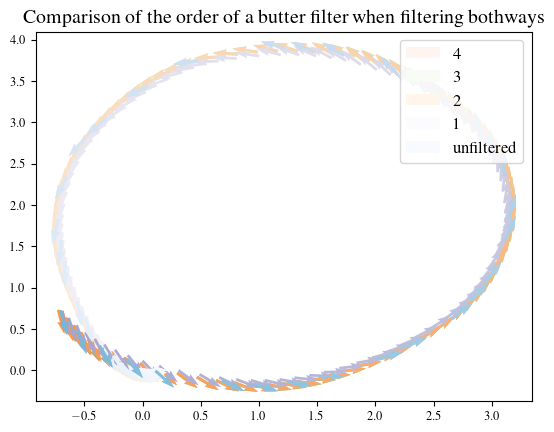

In [257]:


window_id = 2
x_filtre, y_fitlre, yaw_fitlre =  filter_x_y_yaw(window_id,icp_x,icp_y,icp_yaw,discrete_filter)
fig, axs = plt.subplots(1,1)
color = [cm.get_cmap("Reds"),cm.get_cmap("Greens"),cm.get_cmap("Oranges"),cm.get_cmap("Purples")]

fs = 20
Wn =  fc #*2*np.pi#angular frequency in rad/s of the cut off frequency
btype="lowpass"
output = "ba"
N=[4,3,2,1]

list_fitler = []
axs.set_title("Comparison of the order of a butter filter when filtering bothways")

for order,u_color in zip(N,color):
    num,denom = butter(order,Wn,btype=btype,output=output,fs=fs)
    
    x_filtre, y_fitlre, yaw_fitlre =  filter_x_y_yaw_butterworth(window_id,icp_x,icp_y,icp_yaw,num,denom,double_filt=True)
    plot_quiv(axs,x_filtre, y_fitlre, yaw_fitlre,f"{order}",u_color)
plot_quiv(axs,icp_x[window_id,:],icp_y[window_id,:],icp_yaw[window_id,:],"unfiltered",cm.get_cmap("Blues"))
axs.legend()

It seems that higher order filter are closer to the unfiltered signal and that going above the second order is not necessary.Using a second order seems to reduce the impact of shrinking for a same cut off frequency.
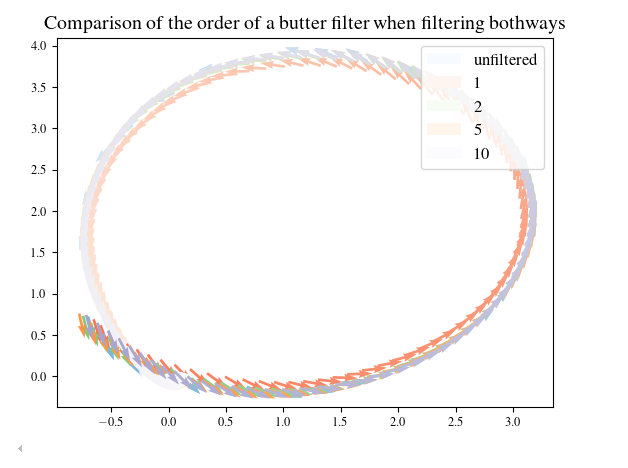


Using even poles seems to be important to prevent the end of the signal from divergin form the end of the signal.

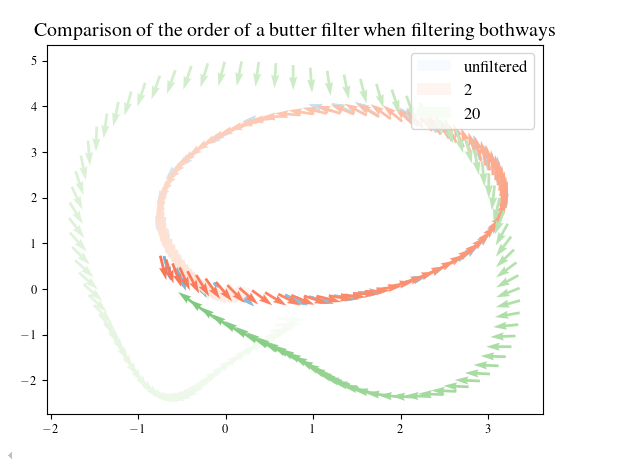

# Conclusion 


1. J'ai ajuste la frequence de coupure et il semble que 1.5 hertz soit le meilleur pour eviter un shrinkage du signal tout en filtrant les erreurs. 
2. Le filtre d'ordre 2 est meilleur, car il est le filtre a ordre minimal qui donne les meilleurs resultats visuels. 

To use: 
1. fc = 1.5 Hz
2. N = 2




/tmp/ipykernel_234798/1333265016.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = [cm.get_cmap("Reds"),cm.get_cmap("Greens"),cm.get_cmap("Oranges"),cm.get_cmap("Purples")]
/tmp/ipykernel_234798/1333265016.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plot_quiv(axs,icp_x[window_id,:],icp_y[window_id,:],icp_yaw[window_id,:],"unfiltered",cm.get_cmap("Blues"))


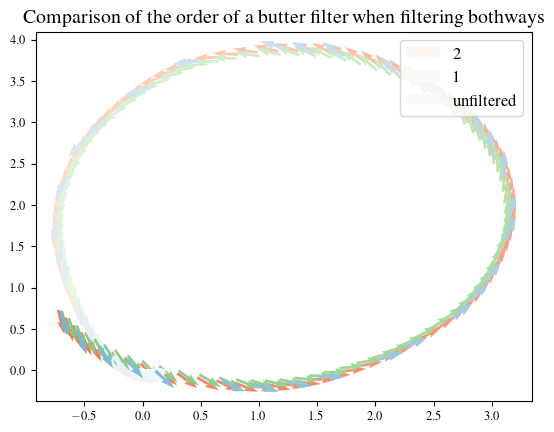

In [259]:

window_id = 2
x_filtre, y_fitlre, yaw_fitlre =  filter_x_y_yaw(window_id,icp_x,icp_y,icp_yaw,discrete_filter)
fig, axs = plt.subplots(1,1)
color = [cm.get_cmap("Reds"),cm.get_cmap("Greens"),cm.get_cmap("Oranges"),cm.get_cmap("Purples")]

fc = 1.5
fs = 20
Wn =  fc #*2*np.pi#angular frequency in rad/s of the cut off frequency
btype="lowpass"
output = "ba"
N=[2,1]

list_fitler = []
axs.set_title("Comparison of the order of a butter filter when filtering bothways")

for order,u_color in zip(N,color):
    num,denom = butter(order,Wn,btype=btype,output=output,fs=fs)
    
    x_filtre, y_fitlre, yaw_fitlre =  filter_x_y_yaw_butterworth(window_id,icp_x,icp_y,icp_yaw,num,denom,double_filt=True)
    plot_quiv(axs,x_filtre, y_fitlre, yaw_fitlre,f"{order}",u_color)
plot_quiv(axs,icp_x[window_id,:],icp_y[window_id,:],icp_yaw[window_id,:],"unfiltered",cm.get_cmap("Blues"))
axs.legend()

One inconvenient of the filter is that we get in straight line more osciallation then with the splines . 
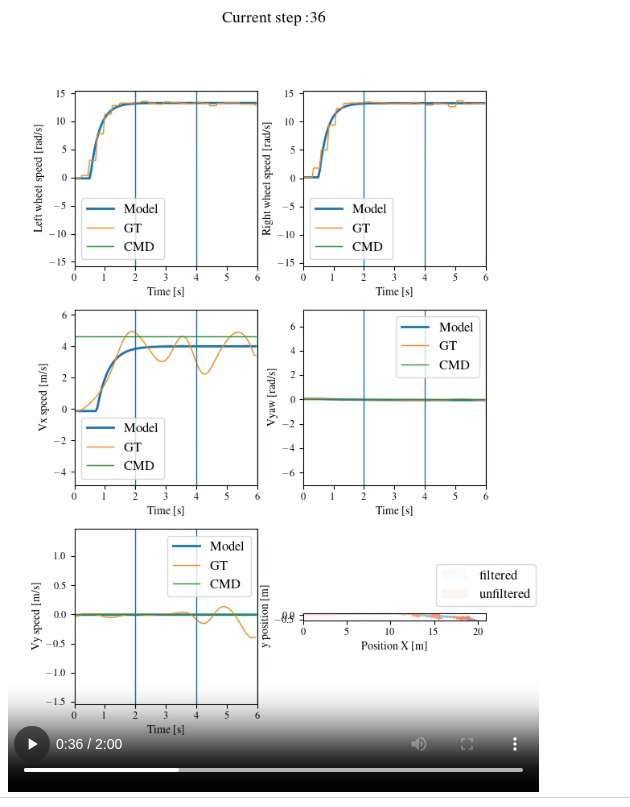

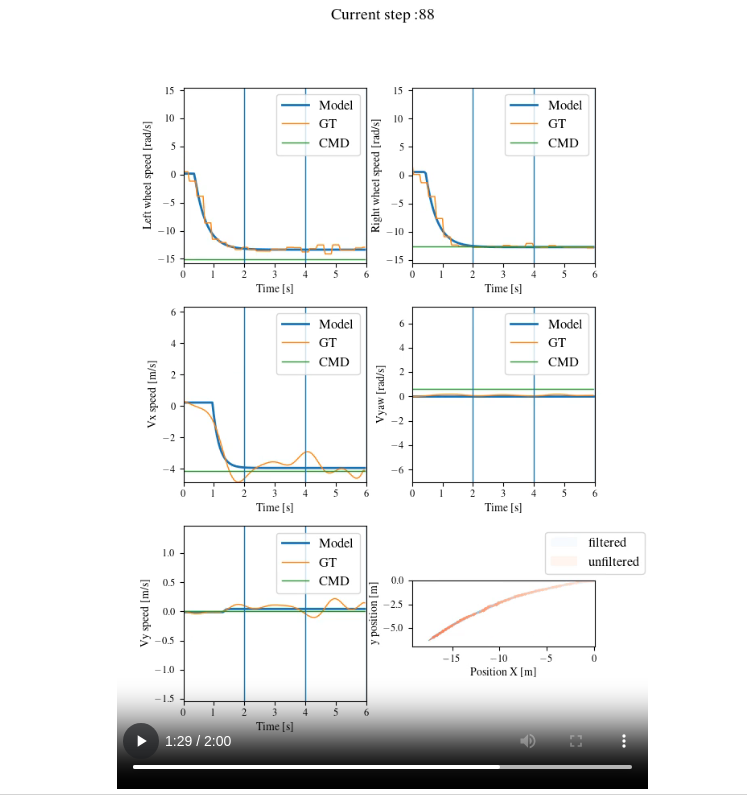
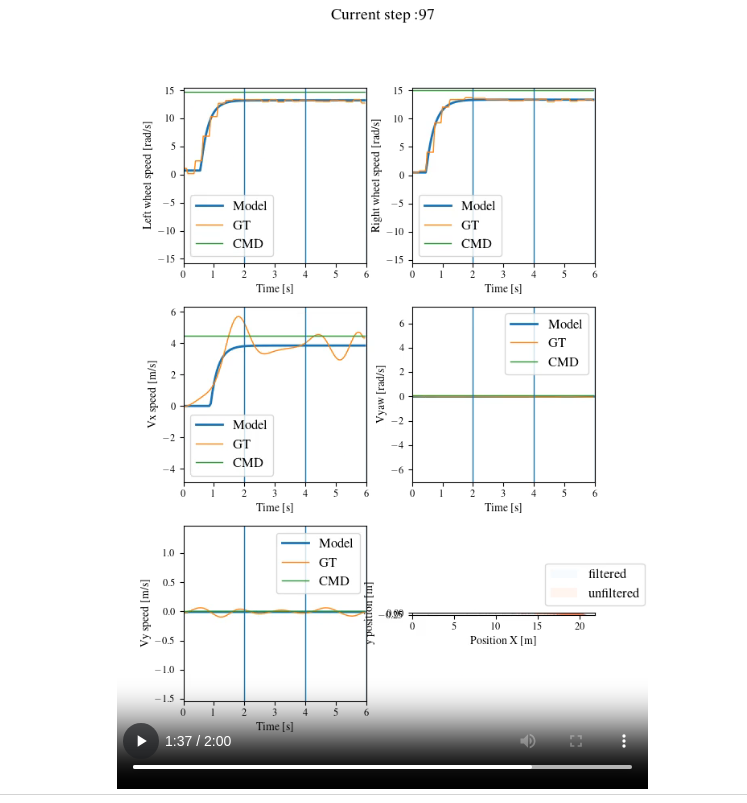
 Param used 

 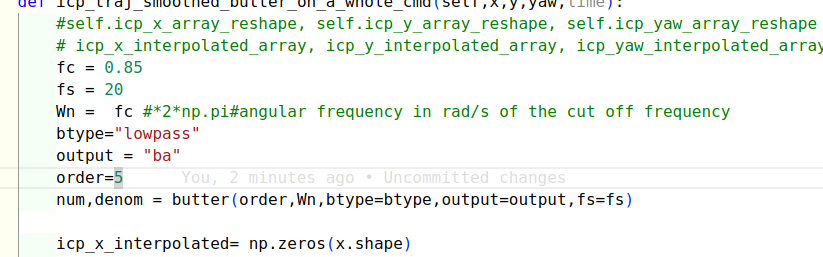
 

After investigation, increasing the frequency from 0.80 to 1.5 yield bigger waves. 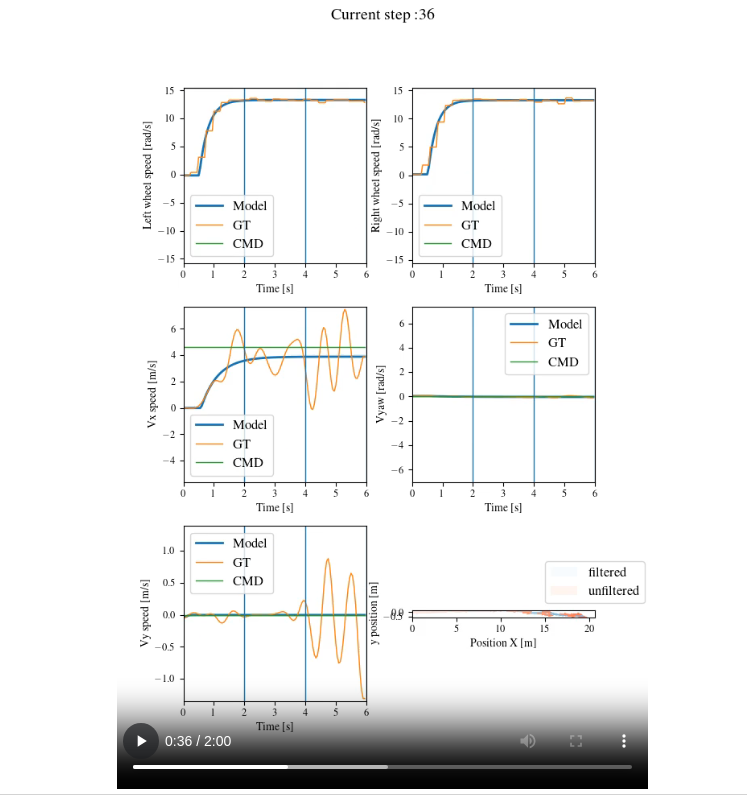

Going in the other sense fc = 0.3 instead of 0.85 yields a wrong version of the circles 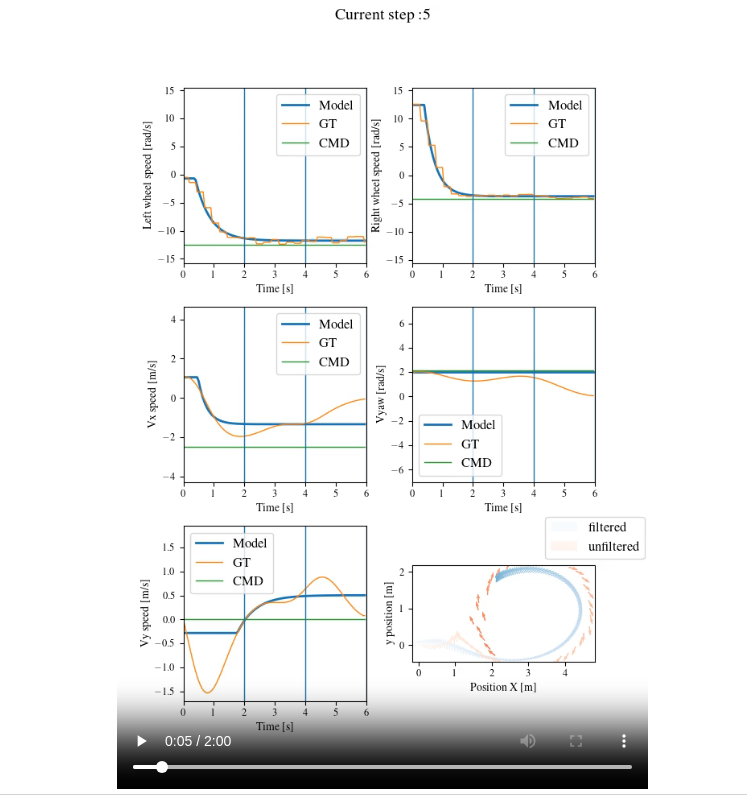

# Conclusion from the derivatives of the position 

It seems that the best smoothing, is obtained with the following parameters because it keeps the form of the trajectories, while smoothing the discontinuities: 
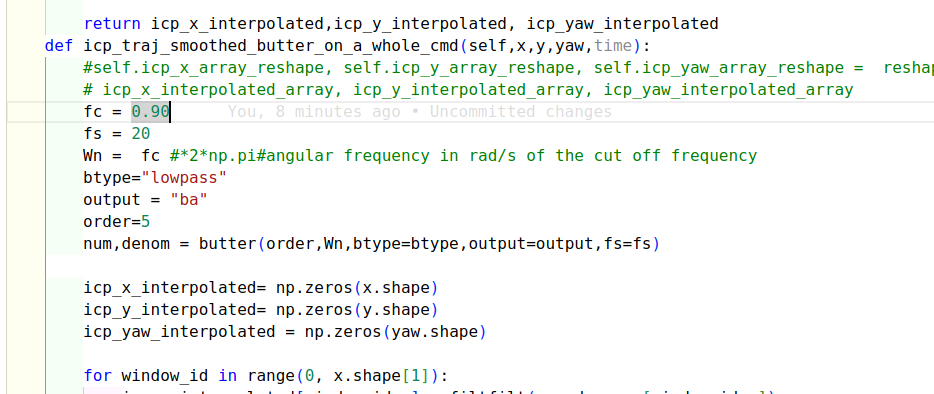